# Regression


In [1]:
from IPython.core.display import Image, display

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

In [3]:

import matplotlib.pyplot as plt
import numpy as np


# Diabetes dataset

[Diabetes](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) is the Dataset we will be using throughout this notebook. It has different variables:


- age in years

- sex

- bmi: body mass index

- bp: average blood pressure

- six measures taken from the blood of the patient

Each variable is already centred and scaled.


In [4]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
feature_names = data['feature_names'] # list with feature names

X = data['data']
Y = data['target']
print("{0:d} observations with {1:d} columns".format(X.shape[0], X.shape[1]))
print("{0:d} targets".format(len(Y)))


442 observations with 10 columns
442 targets


# Feature selection


We want to tell if any of the variables are noisy, not relevant and see which ones are more critical than the others.


# Regression methods

We will use several methods for this task: 

> [Random Forest (regression)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

> [Knn (regression)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

> [Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

> [Kernel ridge regression with RBF kernel](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)



# Measure performances

We will use **cross-validation** as well as $R^2$ to measure the performance

# 1. Selection of hyperparameters for all the methods


We will obtain a reasonable set of *hyperparameters* for all the methods. For each method, we will use the following estimations of the initial parameters:

- Random Forests:
  - number of trees: 10, 20, 50, 100, 200, 500, 1000
- $k$NN:
  - $k$: 1,2,3,5,7,10,15,20,40, 80
  - weight: uniform and distance
- Ridge regression:
  - `alpha`: 0.001, 0.01, 0.1, 1

- Kernel ridge regression:
  - `alpha`: 0.001, 0.01, 0.1, 1
  - `gamma` for the RBF kernel: 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1



In [5]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge

def my_grid(clf, parameters_clf):
    # clf is an estimator
    # parameters_clf is a dictionary with parameters in the GridSearchCV way
    # that is, the keys must look like 'clf__parameter_name'
    v_scaler = ['passthrough', StandardScaler()]
    parameters_pipeline = {'scaler':v_scaler}
    main_parameters = {'clf':[clf]}

    # add the dictionary with the scaler part to the main_parameters dictionary
    main_parameters.update(parameters_pipeline)
    
    # add parameters_clf to the  main_parameters dictionary
    main_parameters.update(parameters_clf)
  
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])        
  
    # construct a grid with the pipeline and the main_parameters
    grid = GridSearchCV(pipe, main_parameters, cv = 5, iid = False)
    
    return grid



## Find hyperparameters

We will now use the function above to find hyperparameters for **RF**, **kNN**, **ridge regression** and **kernel ridge regression**. 


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

knn_params = {
    'clf__n_neighbors' : [1,2,3,5,7,10,15,20,40, 80],
    'clf__weights' : ['uniform' , 'distance']
}
rf_params = {
    'clf__n_estimators' : [10, 20, 50, 100, 200, 500, 1000],
    'clf__max_leaf_nodes' : [5, 10, 20, 50]
}
ridge_regression_params = {
    'clf__alpha' : [0.001, 0.01, 0.1, 1],
}
kernel_ridge_regression_params = {
    'clf__alpha' : [0.001, 0.01, 0.1, 1],
    'clf__gamma' : [ 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
}


my_knn_grid = my_grid(KNeighborsRegressor(), knn_params)
grid_knn_results = my_knn_grid.fit(X, Y).best_params_

my_rf_grid = my_grid(RandomForestRegressor(), rf_params)
grid_rf_results = my_rf_grid.fit(X, Y).best_params_

my_ridge_reg_grid = my_grid(Ridge(), ridge_regression_params)
grid_ridge_reg_results = my_ridge_reg_grid.fit(X, Y).best_params_

my_kernel_ridge_grid = my_grid(KernelRidge(),kernel_ridge_regression_params)
grid_kernel_ridge_results = my_kernel_ridge_grid.fit(X, Y).best_params_


/Users/goni/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/goni/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/goni/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/goni/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [7]:
print(grid_knn_results)
print(grid_rf_results)
print(grid_ridge_reg_results)
print(grid_kernel_ridge_results)


{'clf': KNeighborsRegressor(n_neighbors=15, weights='distance'), 'clf__n_neighbors': 15, 'clf__weights': 'distance', 'scaler': StandardScaler()}
{'clf': RandomForestRegressor(max_leaf_nodes=20, n_estimators=200), 'clf__max_leaf_nodes': 20, 'clf__n_estimators': 200, 'scaler': StandardScaler()}
{'clf': Ridge(alpha=0.1), 'clf__alpha': 0.1, 'scaler': StandardScaler()}
{'clf': KernelRidge(alpha=0.001, gamma=0.01), 'clf__alpha': 0.001, 'clf__gamma': 0.01, 'scaler': StandardScaler()}


**Average and standard deviation of the score $R^2$ achieved by each method with its better hyperparameters**

In [9]:
from sklearn.model_selection import cross_val_score

print('KNN:\n')
neigh = KNeighborsRegressor(n_neighbors= 15, weights= 'distance')
neigh.fit(X, Y)
scores = cross_val_score(neigh, X, Y, cv=5)
print('R2 mean: ',scores.mean())
print('R2 standard deviation: ',scores.std())

KNN:

R2 mean:  0.4521036806793365
R2 standard deviation:  0.0588063911194236


In [10]:
print('Random forest:\n')
rf = RandomForestRegressor(max_leaf_nodes= 10, n_estimators=20)
f = rf.fit(X, Y)
scores = cross_val_score(rf, X, Y, cv=5)
print('R2 mean: ',scores.mean())
print('R2 standard deviation: ',scores.std())

Random forest:

R2 mean:  0.43796627586184655
R2 standard deviation:  0.0650614444305181


In [11]:
print('Ridge regression:\n')
linear = Ridge(alpha = 0.1)
f = linear.fit(X, Y)
scores = cross_val_score(linear, X, Y, cv=5)
print('R2 mean: ',scores.mean())
print('R2 standard deviation: ',scores.std())

Ridge regression:

R2 mean:  0.47988368563401884
R2 standard deviation:  0.047263511492239285


In [12]:

kernel_ridge = KernelRidge(alpha = 0.001, gamma=0.01)
f = kernel_ridge.fit(X, Y)
scores = cross_val_score(kernel_ridge, X, Y, cv=5)
print('R2 mean: ',scores.mean())
print('R2 standard deviation: ',scores.std())

R2 mean:  -3.787429826175886
R2 standard deviation:  0.6789174682862079


## Measures of training and evaluation time

We will now use the function `cross_validate` to obtain the estimations of the time needed to train each method and evaluate a test set.


In [16]:
from sklearn.model_selection import cross_validate
neigh = KNeighborsRegressor(n_neighbors= 15, weights= 'distance')
rf = RandomForestRegressor(max_leaf_nodes= 20, n_estimators=100)
linear = Ridge(alpha = 0.1)
kernel_ridge = KernelRidge(alpha = 0.001, gamma=0.01)

cv_results_knn = cross_validate(neigh, X, Y, cv=10)
cv_results_rf = cross_validate(rf, X, Y, cv=10)
cv_results_linear = cross_validate(linear, X, Y, cv=10)
cv_results_kernel_ridge = cross_validate(kernel_ridge, X, Y, cv=10)


In [17]:
print('\nKNN time results:')#, cv_results_knn)
test_knn = np.mean(cv_results_knn['test_score'])
fit_time_knn = np.mean(cv_results_knn['fit_time'])
score_time_knn = np.mean(cv_results_knn['score_time'])
print('test_score:', test_knn)
print('fit_time:', fit_time_knn)
print('score_time:', score_time_knn)


print('\nRF time results:')#, cv_results_rf)
test_rf = np.mean(cv_results_rf['test_score'])
fit_time_rf = np.mean(cv_results_rf['fit_time'])
score_time_rf = np.mean(cv_results_rf['score_time'])
print('test_score:', test_rf)
print('fit_time:',fit_time_rf)
print('score_time:', score_time_rf)


print('\nLinear time results:')#, cv_results_linear)
test_lin = np.mean(cv_results_linear['test_score'])
fit_time_lin = np.mean(cv_results_linear['fit_time'])
score_time_lin = np.mean(cv_results_linear['score_time'])
print('test_score:', test_lin)
print('fit_time:', fit_time_lin)
print('score_time:', score_time_lin)


print('\nKernel Ridge time results:')#, cv_results_kernel_ridge)
test_kernel_ridge = np.mean(cv_results_kernel_ridge['test_score'])
fit_time_kernel_ridge = np.mean(cv_results_kernel_ridge['fit_time'])
score_time_kernel_ridge = np.mean(cv_results_kernel_ridge['score_time'])
print('test_score:', test_kernel_ridge)
print('fit_time:', fit_time_kernel_ridge)
print('score_time:', score_time_kernel_ridge)



KNN time results:
test_score: 0.4201823709196013
fit_time: 0.0007848739624023438
score_time: 0.0016630887985229492

RF time results:
test_score: 0.41356970069114685
fit_time: 0.11303291320800782
score_time: 0.00340118408203125

Linear time results:
test_score: 0.4633240541517593
fit_time: 0.0002598762512207031
score_time: 0.0001466989517211914

Kernel Ridge time results:
test_score: -3.942208022743601
fit_time: 0.00255887508392334
score_time: 0.00033500194549560545


## Visual representation

Now a plot of the data will be created to give a different approach.


In [20]:
r_squared = [test_knn, test_rf, test_lin, test_kernel_ridge]
time_fit = [fit_time_knn, fit_time_rf, fit_time_lin, fit_time_kernel_ridge]
time_score = [score_time_knn, score_time_rf, score_time_lin, score_time_kernel_ridge]

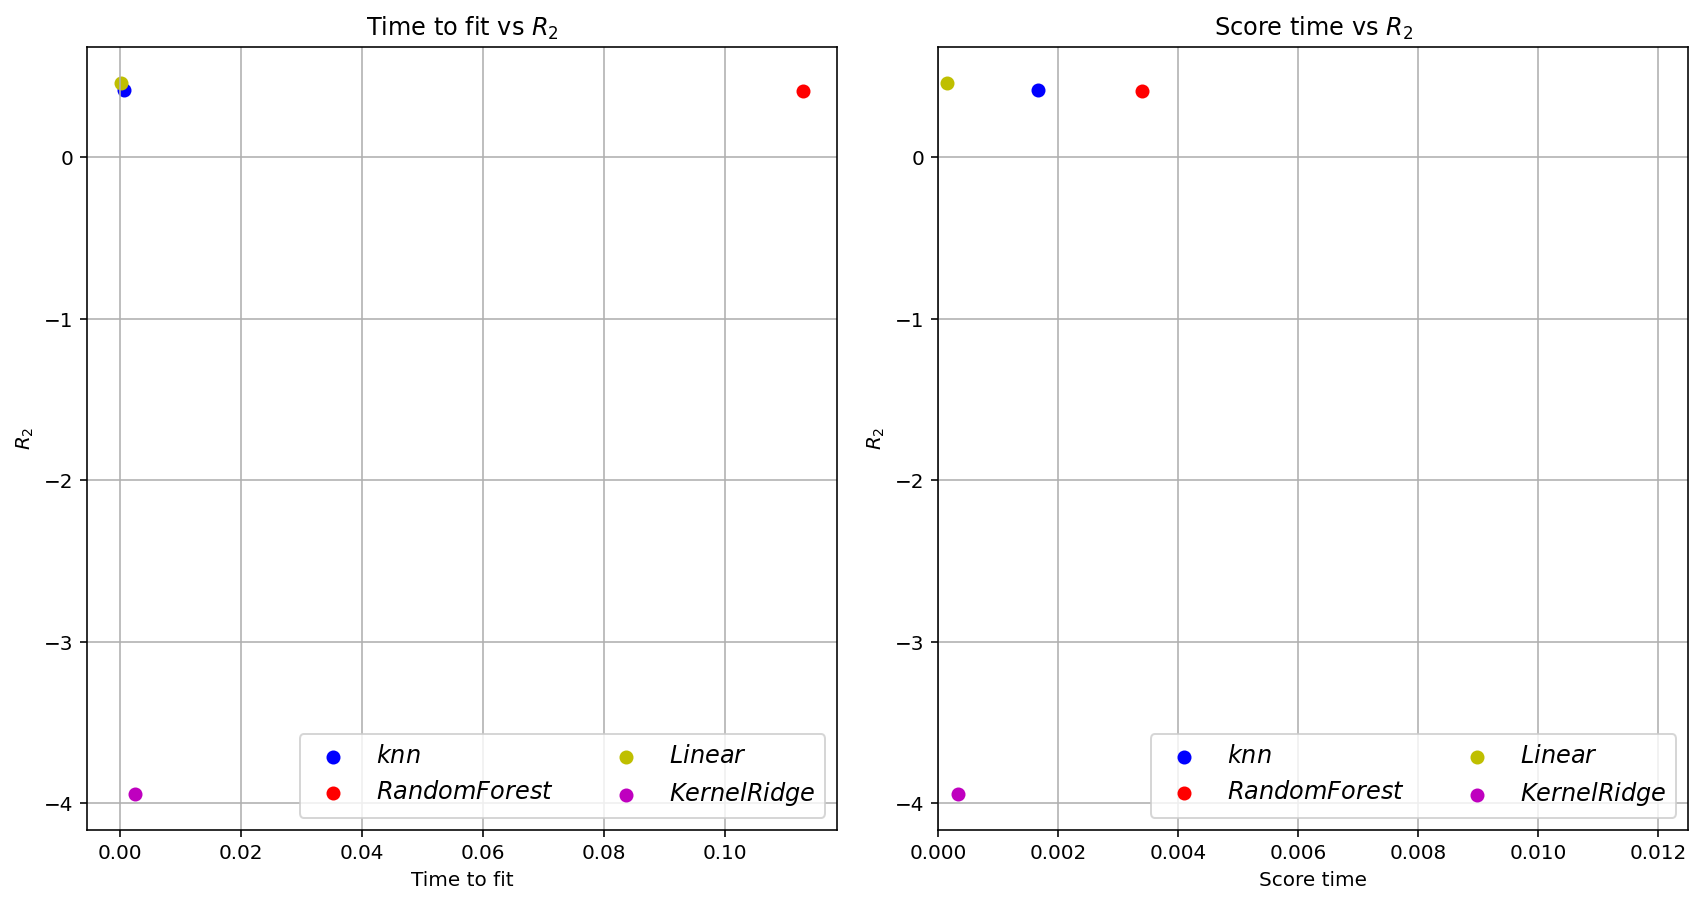

In [23]:
import matplotlib.pyplot as plt


# we can see a scatter plot of the performance of the methods compared with the time to fit, as well as a 
# comparison between the time to fit and the R^2.

fig = plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)

colors = ['b', 'r', 'y', 'm', 'g']
first_point_a = plt.scatter(time_fit[0], r_squared[0], marker='o', color=colors[0])
second_point_a = plt.scatter(time_fit[1], r_squared[1], marker='o', color=colors[1])
third_point_a  = plt.scatter(time_fit[2], r_squared[2], marker='o', color=colors[2])
fourth_point_a  = plt.scatter(time_fit[3], r_squared[3], marker='o', color=colors[3])
plt.legend((first_point_a, second_point_a, third_point_a, fourth_point_a),
           ('$knn$', '$Random Forest$', '$Linear$', '$Kernel Ridge$'),scatterpoints=1,loc='lower right',
           ncol=2,fontsize=12)
plt.xlabel('Time to fit')
plt.ylabel('$R_2$')
plt.title('Time to fit vs $R_2$')
plt.grid()


plt.subplot(2, 2, 2)
colors = ['b', 'r', 'y', 'm', 'g']
first_point_b = plt.scatter(time_score[0], r_squared[0], marker='o', color=colors[0])
second_point_b = plt.scatter(time_score[1], r_squared[1], marker='o', color=colors[1])
third_point_b  = plt.scatter(time_score[2], r_squared[2], marker='o', color=colors[2])
fourth_point_b  = plt.scatter(time_score[3], r_squared[3], marker='o', color=colors[3])
plt.legend((first_point_b, second_point_b, third_point_b, fourth_point_b),
           ('$knn$', '$Random Forest$', '$Linear$', '$Kernel Ridge$'),scatterpoints=1,loc='lower right',
           ncol=2,fontsize=12)
plt.xlabel('Score time')
plt.ylabel('$R_2$')
plt.title('Score time vs $R_2$')
plt.xlim(0, 0.0125)
plt.grid()

fig.tight_layout() 

plt.show()


## Advantages and disadvantages of each method

**Linear and knn:** These methods are really close to each other in both graphs, with them we obtain the fastest time with the higher value of $R_2$.


**Random Forest:** This method has the highest value of the score time and the value of $R_2$ is not that good.


**Kernel Ridge:** It has a low time for both fit and score, and it has a negative value of $R_2$.

